## Exploratory Data Analysis 

Included in this file is exploratory data analysis on the following datasets: Traffic, Weather, Pollution

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
# Set agg.path.chunksize to a higher value
mpl.rcParams['agg.path.chunksize'] = 10000

sns.set()

## Traffic information

- Run File Traffic Processing to aggregate and generate csv file

In [2]:
numeric_cols = ['vehicle_count', 'avg_speed',  'avg_measured_time', 'median_measured_time']

traffic_df = pd.read_csv("../data/aarhus_traffic_data_aug_nov_2014.csv")
traffic_df['timestamp'] = pd.to_datetime(traffic_df['timestamp'])
traffic_df.set_index('timestamp', inplace=True)
traffic_df.head()

,Unnamed: 0,status,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
timestamp,,,,,,,,,
2014-08-01 07:50:00,0,OK,74,50,668,74,5,20746220,158324
2014-08-01 07:55:00,1,OK,73,50,668,73,6,20746392,158324
2014-08-01 08:00:00,2,OK,61,60,668,61,4,20746723,158324
2014-08-01 08:05:00,3,OK,61,60,668,61,1,20747172,158324
2014-08-01 08:10:00,4,OK,63,58,668,63,3,20747545,158324


In [3]:

traffic_df.describe()

,Unnamed: 0,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
count,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07
mean,6.792128e+03,1.084685e+02,4.364266e+01,8.307501e+02,1.084685e+02,3.120078e+00,2.665867e+07,1.904506e+05
std,4.299058e+03,1.790712e+02,2.167510e+01,1.293762e+02,1.790712e+02,5.755237e+00,3.386352e+06,1.170804e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,2.074616e+07,1.583240e+05
25%,3.207000e+03,5.400000e+01,2.900000e+01,7.180000e+02,5.400000e+01,0.000000e+00,2.373267e+07,1.846210e+05
50%,6.414000e+03,8.100000e+01,4.200000e+01,8.300000e+02,8.100000e+01,1.000000e+00,2.667744e+07,1.907700e+05
75%,9.648000e+03,1.160000e+02,5.700000e+01,9.420000e+02,1.160000e+02,4.000000e+00,2.959456e+07,1.979770e+05
max,1.698600e+04,3.585000e+03,1.500000e+02,1.058000e+03,3.585000e+03,1.090000e+02,3.250969e+07,2.101990e+05


In [4]:
# Sampling
# Aggregate numeric columns by mean for hourly intervals
#hourly_data = traffic_df[numeric_cols].resample('H').mean().reset_index()
sampled_data = traffic_df.sample(frac=0.1, random_state=42).sort_index()
sampled_data.describe()

,Unnamed: 0,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
count,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06
mean,6.788427e+03,1.085409e+02,4.366623e+01,8.305570e+02,1.085409e+02,3.113215e+00,2.666235e+07,1.904418e+05
std,4.299832e+03,1.791163e+02,2.170690e+01,1.293869e+02,1.791163e+02,5.751191e+00,3.388105e+06,1.171799e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,2.074617e+07,1.583240e+05
25%,3.201000e+03,5.400000e+01,2.900000e+01,7.180000e+02,5.400000e+01,0.000000e+00,2.373328e+07,1.846210e+05
50%,6.408000e+03,8.100000e+01,4.200000e+01,8.290000e+02,8.100000e+01,1.000000e+00,2.668752e+07,1.907700e+05
75%,9.640000e+03,1.170000e+02,5.700000e+01,9.420000e+02,1.170000e+02,4.000000e+00,2.960097e+07,1.979770e+05
max,1.698000e+04,3.585000e+03,1.490000e+02,1.058000e+03,3.585000e+03,1.040000e+02,3.250968e+07,2.101990e+05


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

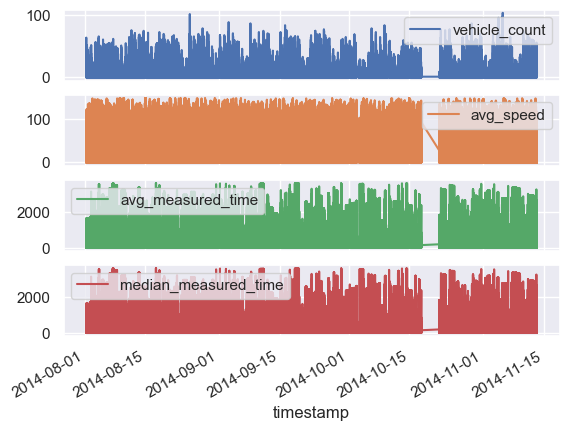

In [5]:
# General Data Visualization
sampled_data[numeric_cols].plot(subplots=True)

In [6]:
# Compute weekly rolling average instead of 5 minute-level
window_size = 7 * 24  # 7 days * 24 hours (weekly window)
df_rolling = sampled_data[numeric_cols].rolling(window=window_size, min_periods=1).mean()
print(df_rolling.columns)
df_rolling.reset_index(inplace=True)
df_rolling.head()


Index(['vehicle_count', 'avg_speed', 'avg_measured_time',
       'median_measured_time'],
      dtype='object')


,timestamp,vehicle_count,avg_speed,avg_measured_time,median_measured_time
0,2014-08-01 07:50:00,0.000000,40.000000,71.000000,71.000000
1,2014-08-01 07:50:00,2.000000,38.000000,86.500000,86.500000
2,2014-08-01 07:50:00,1.333333,28.666667,143.666667,143.666667
3,2014-08-01 07:50:00,1.000000,30.000000,132.000000,132.000000
4,2014-08-01 07:50:00,1.400000,37.200000,126.000000,126.000000


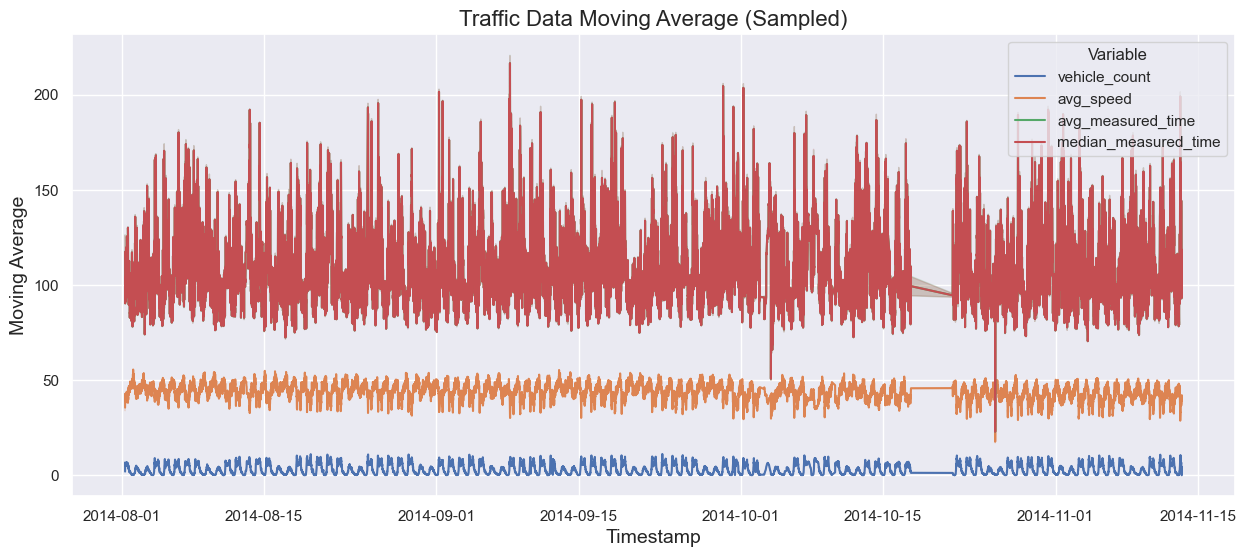

In [7]:
# Reshape for Seaborn
long_rolling_avg_sampled = df_rolling.melt(id_vars='timestamp', var_name='Variable', value_name='Value')

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=long_rolling_avg_sampled, x='timestamp', y='Value', hue='Variable')
plt.title('Traffic Data Moving Average (Sampled)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Moving Average', fontsize=14)
plt.legend(title='Variable', loc='upper right')
plt.grid(True)
plt.show()

   timestamp  vehicle_count  avg_speed  avg_measured_time  \
0 2014-08-03       2.300003  45.170541         103.674205   
1 2014-08-10       3.137764  44.727969         110.853287   
2 2014-08-17       3.067508  44.806747         107.061282   
3 2014-08-24       3.365349  44.626957         108.749030   
4 2014-08-31       3.369730  44.590592         106.339931   

   median_measured_time  
0            103.674205  
1            110.853287  
2            107.061282  
3            108.749030  
4            106.339931  


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

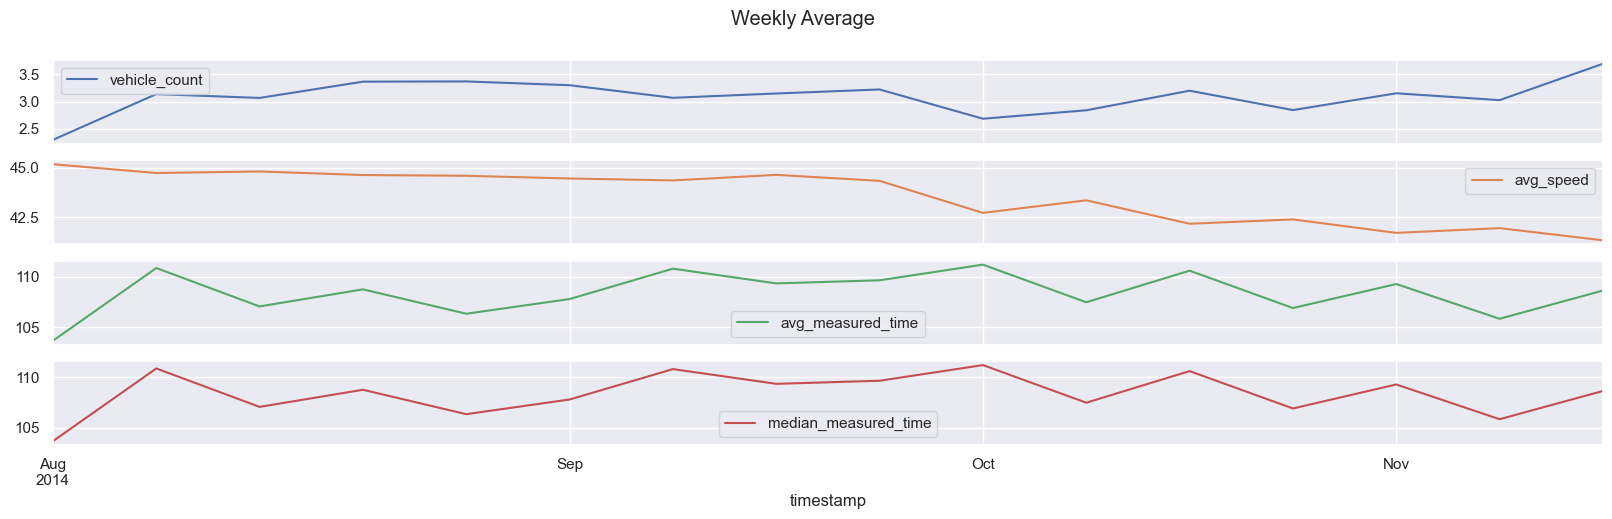

In [8]:
month_means = sampled_data.reset_index().groupby(
    pd.Grouper(key="timestamp", freq="1W"))[numeric_cols].mean().reset_index()
print(month_means.head())

month_means.plot('timestamp', 
                 figsize = (20,5), 
                 subplots=True, 
                 title="Weekly Average")


In [9]:
traffic_df.head()

,Unnamed: 0,status,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
timestamp,,,,,,,,,
2014-08-01 07:50:00,0,OK,74,50,668,74,5,20746220,158324
2014-08-01 07:55:00,1,OK,73,50,668,73,6,20746392,158324
2014-08-01 08:00:00,2,OK,61,60,668,61,4,20746723,158324
2014-08-01 08:05:00,3,OK,61,60,668,61,1,20747172,158324
2014-08-01 08:10:00,4,OK,63,58,668,63,3,20747545,158324


In [10]:
traffic_df['hour'] = traffic_df.index.hour
traffic_df['day'] = traffic_df.index.day

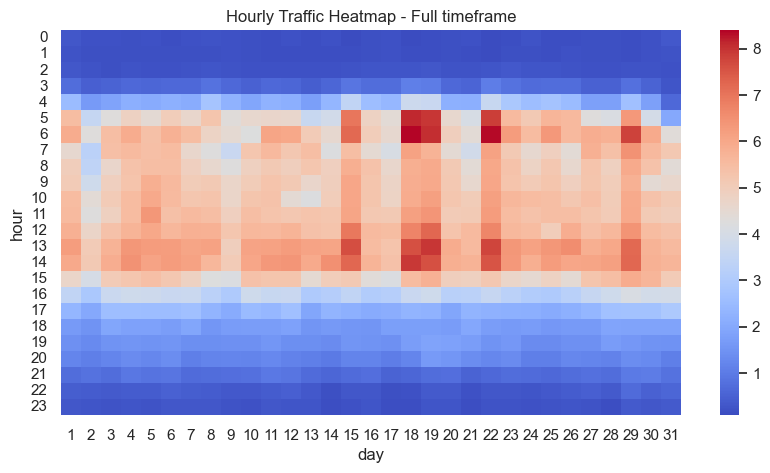

In [11]:
# Pivot table for heatmap
heatmap_data = traffic_df.pivot_table(values='vehicle_count', index='hour', columns='day', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Hourly Traffic Heatmap - Full timeframe')
plt.show()

/opt/homebrew/anaconda3/envs/masters/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


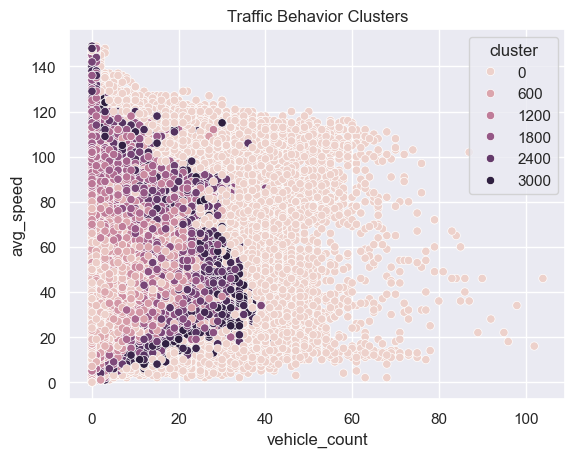

In [12]:
# Cluster vehicle_count and avg_speed
# Grouping ttraffic information trying to indentify congestion
X = sampled_data[['vehicle_count', 'avg_speed']].values
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X)
sampled_data['cluster'] = clustering.labels_

# Visualize clusters
sns.scatterplot(data=sampled_data, x='vehicle_count', y='avg_speed', hue='cluster')
plt.title('Traffic Behavior Clusters')
plt.show()

## Parking information



In [13]:
parking_df = pd.read_csv("../data/aarhus_parking_geolocated.csv")
parking_df['updatetime'] = pd.to_datetime(parking_df['updatetime'], format='mixed')
parking_df.set_index('updatetime', inplace=True)
parking_df.head()

,Unnamed: 0,vehiclecount,_id,totalspaces,garagecode,streamtime,latitude,longitude,address
updatetime,,,,,,,,,
2014-05-22 09:09:04.145,0,0,1,65,NORREPORT,2014-11-03 16:18:44,56.160634,10.212609,"Nørreport, Aarhus Ø, Aarhus, Aarhus Kommune, R..."
2014-05-22 09:09:04.145,1,0,2,512,SKOLEBAKKEN,2014-11-03 16:18:44,56.157146,10.213121,"Skolebakken, Aarhus, Aarhus Kommune, Region Mi..."
2014-05-22 09:09:04.145,2,869,3,1240,SCANDINAVIAN CENTER,2014-11-03 16:18:44,56.152770,10.197070,"Scandinavian Center Aarhus, Skovgaardsgade, Fr..."
2014-05-22 09:09:04.145,3,22,4,953,BRUUNS,2014-11-03 16:18:44,56.149019,10.204733,"Bruuns Galleri, Værkmestergade, Midtbyen, Fred..."
2014-05-22 09:09:04.145,4,124,5,130,BUSGADEHUSET,2014-11-03 16:18:44,56.155552,10.206232,"Busgadehuset, Telefontorvet, Midtbyen, Frederi..."


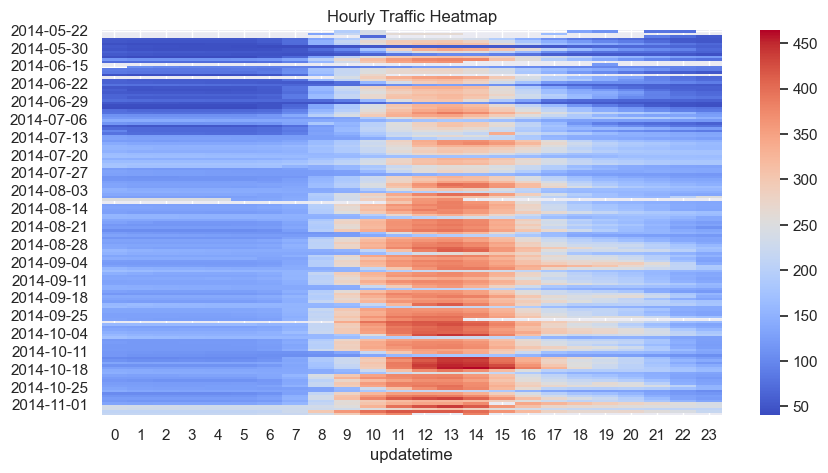

In [14]:
# Pivot table for heatmap
heatmap_data = parking_df.pivot_table(values='vehiclecount', index=parking_df.index.date, columns=parking_df.index.hour, aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Hourly Traffic Heatmap')
plt.show()

### Connecting Traffic and Parking

In [15]:
# Defining analysis period
# Using parking data information as baseline for analysis
date_start = parking_df.index.min()
date_end = parking_df.index.max() 

print(f'Period covered: {date_start} - {date_end}')

Period covered: 2014-05-22 09:09:04.145000 - 2014-11-04 14:13:47.581000


In [16]:
# sampling traffic for period based on parking timeframe
date_sample_traffic = traffic_df.loc[(traffic_df.index >= date_start) & (traffic_df.index <= date_end)]

# Resample traffic data
traffic_resampled = traffic_df['vehicle_count'].resample('15T').mean()

# Resample parking data
parking_resampled = parking_df['vehiclecount'].resample('15T').mean()

# Combine into a single DataFrame
combined_traffic_parking_df = pd.concat([traffic_resampled, parking_resampled], axis=1)

combined_traffic_parking_df = pd.merge_asof(
    traffic_resampled.sort_index(),
    parking_resampled.sort_index(),
    left_index=True,
    right_index=True,
    direction='nearest'
)
combined_traffic_parking_df.rename(columns = {"vehiclecount": "parking_occupancy"}, inplace=True)


median_values = combined_traffic_parking_df.median()
print(median_values)
for col, variable in median_values.items():
    combined_traffic_parking_df.fillna({col: variable}, inplace=True)

combined_traffic_parking_df

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/398242062.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_resampled = traffic_df['vehicle_count'].resample('15T').mean()


vehicle_count          2.291538
parking_occupancy    219.812500
dtype: float64


/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/398242062.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  parking_resampled = parking_df['vehiclecount'].resample('15T').mean()


,vehicle_count,parking_occupancy
timestamp,,
2014-08-01 07:45:00,5.667539,219.8125
2014-08-01 08:00:00,5.068659,157.2500
2014-08-01 08:15:00,5.417223,219.8125
2014-08-01 08:30:00,5.369481,177.6250
2014-08-01 08:45:00,5.536645,219.8125
...,...,...
2014-11-13 09:45:00,0.772321,382.5000
2014-11-13 10:00:00,0.000000,382.5000
2014-11-13 10:15:00,0.000000,382.5000


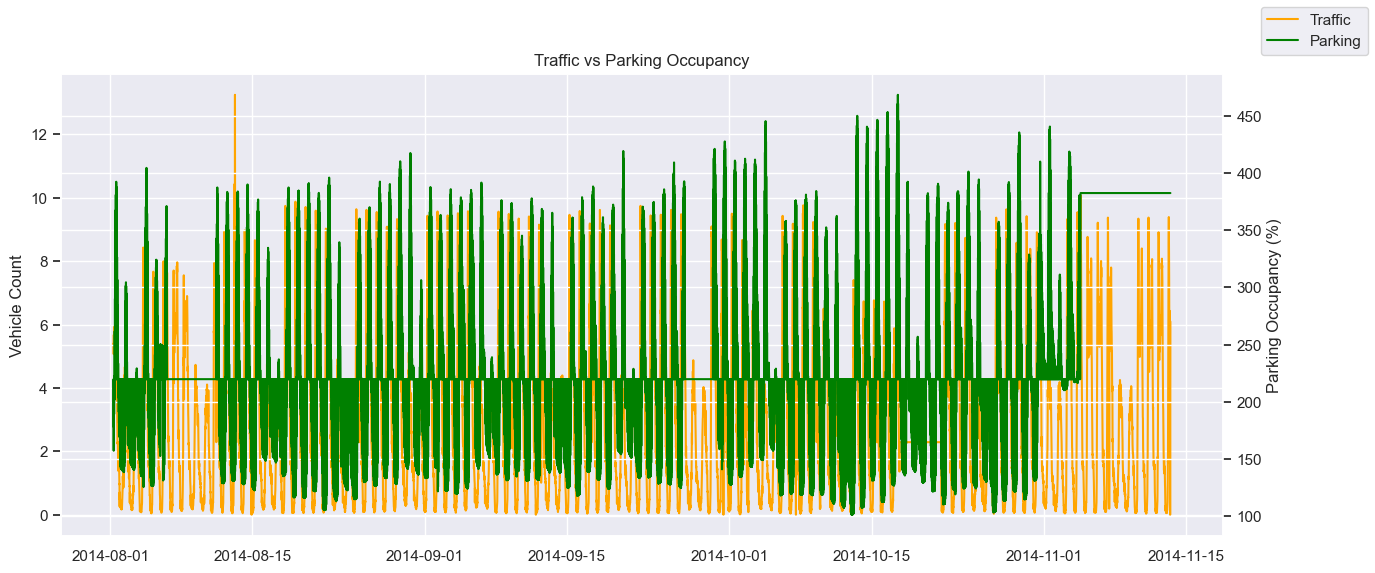

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Traffic data
ax1.plot(combined_traffic_parking_df.index, combined_traffic_parking_df['vehicle_count'], color='orange', label='Traffic')
ax1.set_ylabel('Vehicle Count')

# Parking data
ax2 = ax1.twinx()
ax2.plot(combined_traffic_parking_df.index, combined_traffic_parking_df['parking_occupancy'], color='green', label='Parking')
ax2.set_ylabel('Parking Occupancy (%)')

plt.title('Traffic vs Parking Occupancy')
fig.legend(loc='upper right')
plt.show()


## Weather Information


In [19]:
weather_df = pd.read_csv("../data/aarhus_weather_data_combined.csv")
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'])
weather_df.set_index('Datetime', inplace=True)
weather_df.head()

,dewptm,pressurem,wdird,tempm,vism,wspdm,hum
Datetime,,,,,,,
2014-02-13 06:20:00,2.0,989.0,170.0,3.0,10.0,16.7,93.0
2014-02-13 13:50:00,1.0,989.0,200.0,7.0,10.0,14.8,66.0
2014-02-13 06:00:00,1.0,990.0,170.0,2.0,11.0,13.0,91.0
2014-02-13 03:00:00,1.0,992.0,150.0,3.0,8.0,20.4,84.0
2014-02-13 13:00:00,1.0,990.0,190.0,6.0,24.0,20.4,62.0


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

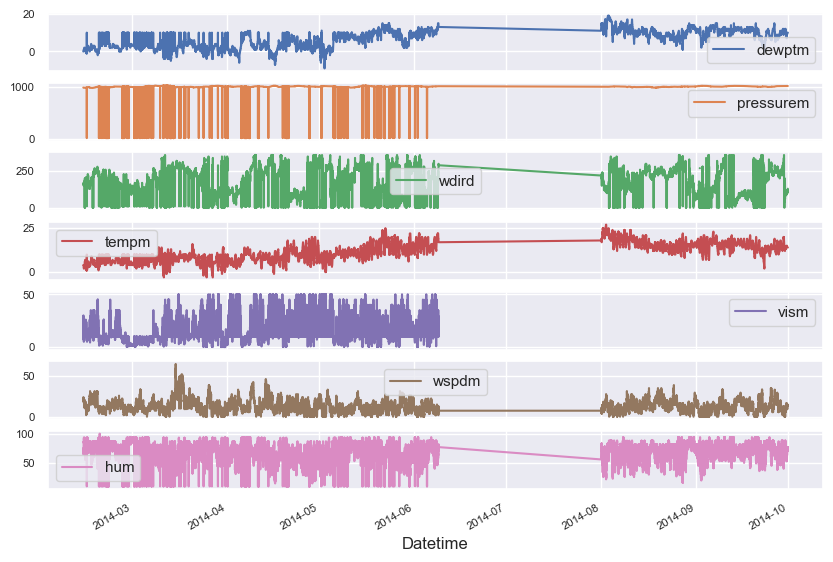

In [20]:
weather_df.sort_index().plot(subplots=True, figsize=(10,7), fontsize=8)

### Asserting dataset Date Alignment

In [21]:
# Data Alignment
print("Traffic Date Range:", traffic_df.index.min(), "-", traffic_df.index.max())
print("Weather Date Range:", weather_df.index.min(), "-", weather_df.index.max())
print("Parking Date Range:", parking_df.index.min(), "-", parking_df.index.max())

Traffic Date Range: 2014-08-01 07:50:00 - 2014-11-13 10:45:00
Weather Date Range: 2014-02-13 00:00:00 - 2014-09-30 23:50:00
Parking Date Range: 2014-05-22 09:09:04.145000 - 2014-11-04 14:13:47.581000


## Correlations

In [22]:
combined_weather_traffic_parking_df = pd.merge_asof(
    combined_traffic_parking_df.sort_index(),
    weather_df.sort_index(),
    left_index=True,
    right_index=True,
    direction='nearest'
).merge(
    parking_df,
    left_index=True,
    right_index=True,
    how='left'
)

combined_weather_traffic_parking_df.head()

,vehicle_count,parking_occupancy,dewptm,pressurem,wdird,tempm,vism,wspdm,hum,Unnamed: 0,vehiclecount,_id,totalspaces,garagecode,streamtime,latitude,longitude,address
2014-08-01 07:45:00,5.667539,219.8125,15.0,1012.0,210.0,19.0,NaN,5.6,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01 08:00:00,5.068659,157.2500,15.0,1013.0,210.0,19.0,NaN,9.3,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01 08:15:00,5.417223,219.8125,15.0,1012.0,230.0,20.0,NaN,7.4,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01 08:30:00,5.369481,177.6250,15.0,1012.0,230.0,20.0,NaN,7.4,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01 08:45:00,5.536645,219.8125,14.0,1012.0,230.0,21.0,NaN,11.1,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


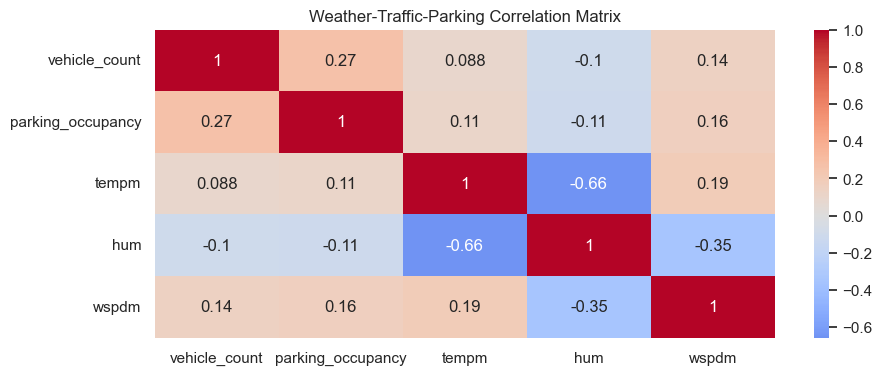

In [23]:
corr_cols = ['vehicle_count', 'parking_occupancy', 'tempm', 'hum', 'wspdm']
corr_matrix = combined_weather_traffic_parking_df[corr_cols].corr()

plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Weather-Traffic-Parking Correlation Matrix')
plt.show()

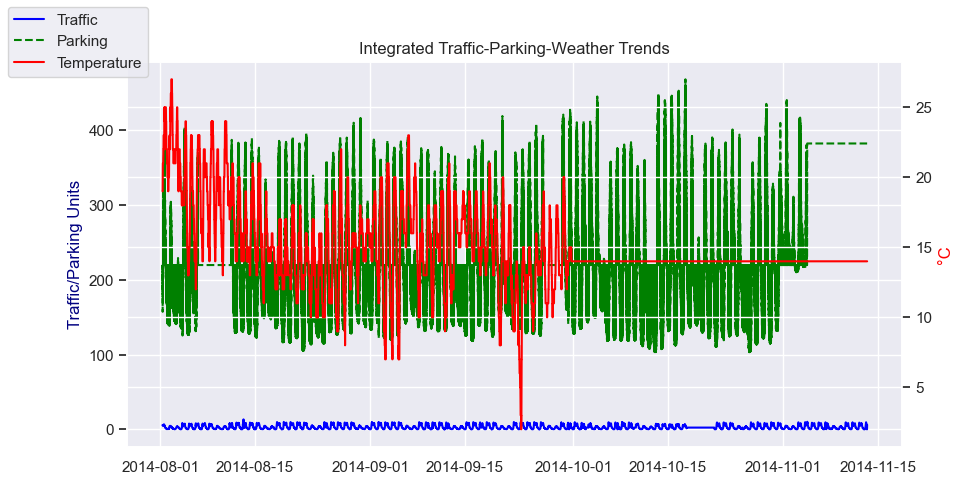

In [24]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Traffic and Parking
ax1.plot(combined_weather_traffic_parking_df.index, combined_weather_traffic_parking_df['vehicle_count'], 
        color='blue', label='Traffic')
ax1.plot(combined_weather_traffic_parking_df.index, combined_weather_traffic_parking_df['parking_occupancy'], 
        color='green', linestyle='--', label='Parking')
ax1.set_ylabel('Traffic/Parking Units', color='navy')

# Weather (Temperature)
ax2 = ax1.twinx()
ax2.plot(combined_weather_traffic_parking_df.index, combined_weather_traffic_parking_df['tempm'], 
        color='red', label='Temperature')
ax2.set_ylabel('°C', color='red')

plt.title('Integrated Traffic-Parking-Weather Trends')
fig.legend(loc='upper left')
plt.show()

In [25]:
# Align frequencies (hourly example)
traffic_hourly = traffic_df['vehicle_count'].resample('H').mean()
weather_hourly = weather_df.resample('H').mean()

# Merge using nearest timestamps 
combined = pd.merge_asof(
    traffic_hourly.to_frame(),
    weather_hourly,
    left_index=True,
    right_index=True,
    direction='nearest'
)

combined

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/1032155318.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_hourly = traffic_df['vehicle_count'].resample('H').mean()
/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/1032155318.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_hourly = weather_df.resample('H').mean()


,vehicle_count,dewptm,pressurem,wdird,tempm,vism,wspdm,hum
timestamp,,,,,,,,
2014-08-01 07:00:00,5.667539,15.000000,1012.333333,210.000000,18.333333,NaN,5.600000,80.000000
2014-08-01 08:00:00,5.349334,14.666667,1012.333333,223.333333,20.000000,NaN,9.266667,68.666667
2014-08-01 09:00:00,5.602708,13.666667,1013.000000,236.666667,21.000000,NaN,11.733333,60.000000
2014-08-01 10:00:00,5.785815,13.333333,1013.000000,206.666667,21.666667,NaN,11.133333,56.000000
2014-08-01 11:00:00,5.703377,13.000000,1012.666667,213.333333,22.666667,NaN,12.366667,50.666667
...,...,...,...,...,...,...,...,...
2014-11-13 06:00:00,7.812872,10.000000,1025.666667,123.333333,14.000000,NaN,14.800000,74.666667
2014-11-13 07:00:00,8.448675,10.000000,1025.666667,123.333333,14.000000,NaN,14.800000,74.666667
2014-11-13 08:00:00,6.040268,10.000000,1025.666667,123.333333,14.000000,NaN,14.800000,74.666667


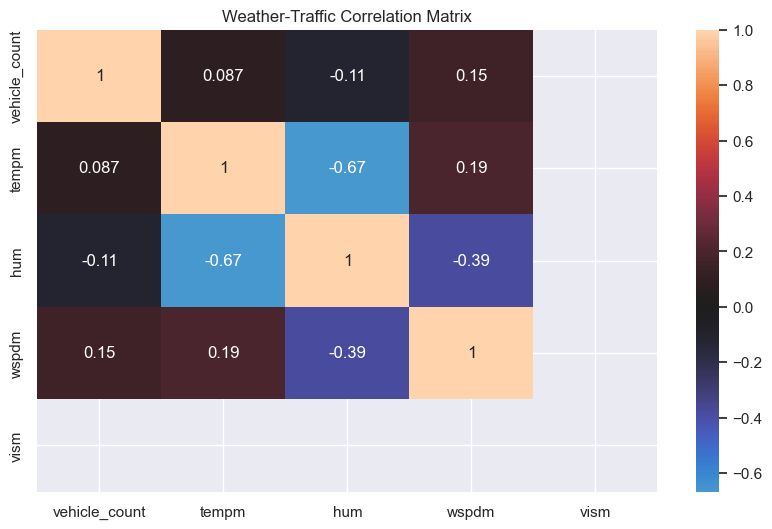

In [26]:
# Calculate correlation matrix 
corr_matrix = combined[['vehicle_count', 'tempm', 'hum', 'wspdm', 'vism']].corr()

# Visualize with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='icefire', center=0)
plt.title('Weather-Traffic Correlation Matrix')
plt.show()

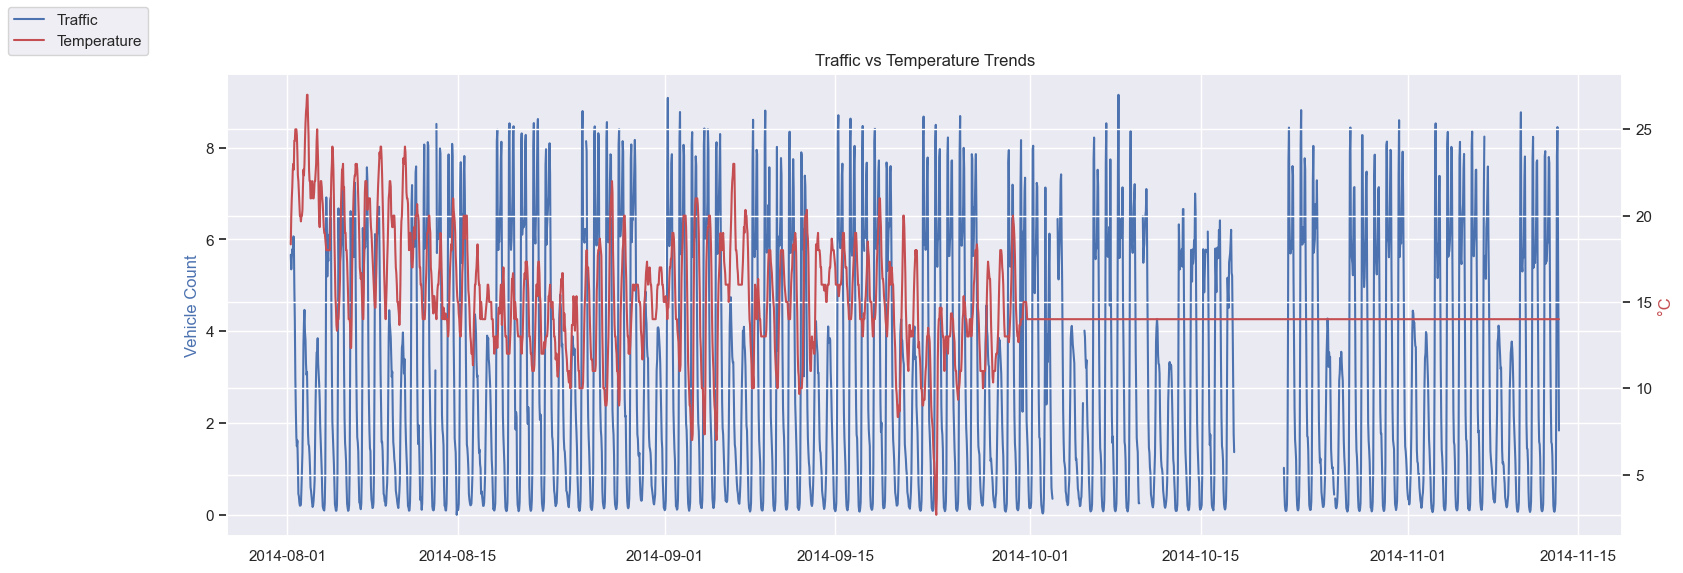

In [27]:
fig, ax1 = plt.subplots(figsize=(18,6))

# Traffic data 
ax1.plot(combined.index, combined['vehicle_count'], 'b', label='Traffic')
ax1.set_ylabel('Vehicle Count', color='b')

# Temperature overlay 
ax2 = ax1.twinx()
ax2.plot(combined.index, combined['tempm'], 'r', label='Temperature')
ax2.set_ylabel('°C', color='r')

# Formatting
plt.title('Traffic vs Temperature Trends')
fig.legend(loc='upper left')
plt.show()

# Pollution information


In [28]:
pollution_df = pd.read_csv("../data/aarhus_pollution_data_aug_oct_2014.csv")
pollution_df['timestamp'] = pd.to_datetime(pollution_df['timestamp'])
pollution_df.set_index('timestamp', inplace=True)
pollution_df.head()

,Unnamed: 0,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
timestamp,,,,,,,,
2014-08-01 00:05:00,0,101,94,49,44,87,10.104986,56.231721
2014-08-01 00:10:00,1,106,97,48,47,86,10.104986,56.231721
2014-08-01 00:15:00,2,107,95,49,42,85,10.104986,56.231721
2014-08-01 00:20:00,3,103,90,51,44,87,10.104986,56.231721
2014-08-01 00:25:00,4,105,94,49,39,82,10.104986,56.231721


## Pollution and Traffic Data (number of cars)

In [29]:
# Align frequencies (hourly example)
traffic_hourly = traffic_df['vehicle_count'].resample('H').mean()
pollution_hourly = pollution_df.resample('H').mean()

# Merge using nearest timestamps 
combined = pd.merge_asof(
    traffic_hourly.to_frame(),
    pollution_hourly,
    left_index=True,
    right_index=True,
    direction='nearest'
)

combined

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/727044792.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_hourly = traffic_df['vehicle_count'].resample('H').mean()
/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_6790/727044792.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pollution_hourly = pollution_df.resample('H').mean()


,vehicle_count,Unnamed: 0,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
timestamp,,,,,,,,,
2014-08-01 07:00:00,5.667539,88.5,65.512992,64.421121,67.119525,67.661099,65.638456,10.176390,56.163503
2014-08-01 08:00:00,5.349334,100.5,66.119339,64.614143,67.667038,68.506310,66.351893,10.176390,56.163503
2014-08-01 09:00:00,5.602708,112.5,67.284336,65.244432,68.087788,69.508723,67.644209,10.176390,56.163503
2014-08-01 10:00:00,5.785815,124.5,68.353007,65.704900,69.197476,70.061804,68.011321,10.176390,56.163503
2014-08-01 11:00:00,5.703377,136.5,69.723274,66.041574,69.413512,71.425575,68.550854,10.176390,56.163503
...,...,...,...,...,...,...,...,...,...
2014-11-13 06:00:00,7.812872,17567.0,117.486607,111.908482,117.517857,112.591518,112.517857,10.176636,56.163597
2014-11-13 07:00:00,8.448675,17567.0,117.486607,111.908482,117.517857,112.591518,112.517857,10.176636,56.163597
2014-11-13 08:00:00,6.040268,17567.0,117.486607,111.908482,117.517857,112.591518,112.517857,10.176636,56.163597


In [30]:
# Time alignment
print("Traffic Date Range:", traffic_df.index.min(), "-", traffic_df.index.max())
print("Pollution Date Range:", pollution_df.index.min(), "-", pollution_df.index.max())

Traffic Date Range: 2014-08-01 07:50:00 - 2014-11-13 10:45:00
Pollution Date Range: 2014-08-01 00:05:00 - 2014-10-01 00:00:00


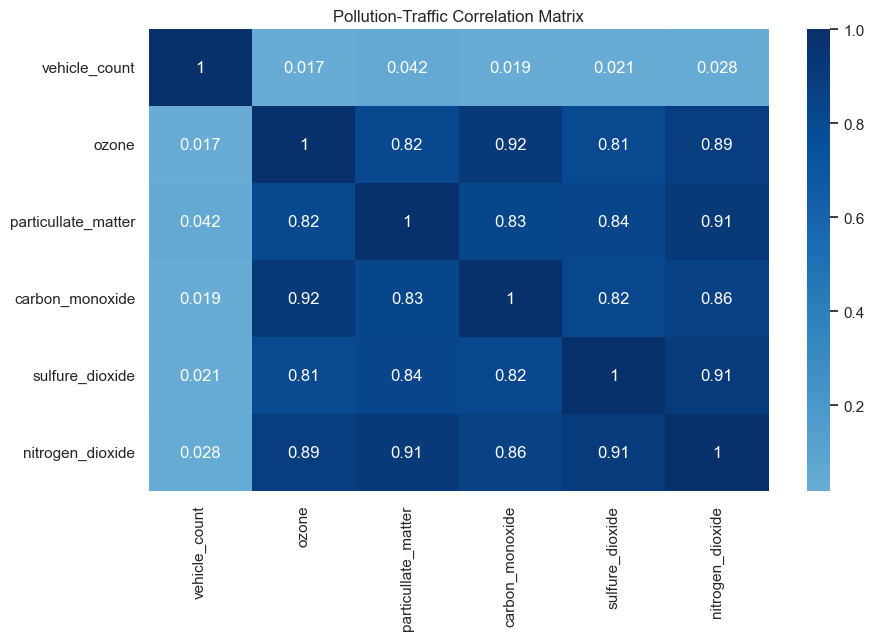

In [31]:
# Calculate correlation matrix 
corr_matrix = combined[['vehicle_count', 'ozone',	'particullate_matter', 'carbon_monoxide', 'sulfure_dioxide', 'nitrogen_dioxide'	]].corr()

# Visualize with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues" ,center=0)
plt.title('Pollution-Traffic Correlation Matrix')
plt.show()

### Pollution and location


In [32]:
import folium
from folium.plugins import HeatMap

AARHUS_GEOLOCATION = [56.16182966470494, 10.197421860666816]

def generateBaseMap(default_location=AARHUS_GEOLOCATION, default_zoom=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom)
    return base_map

pollution_sensor = pollution_df.groupby(["latitude", "longitude"]).count().reset_index()
map = generateBaseMap()

# markers on a map
for index, address in pollution_sensor.iterrows():
   folium.Marker(
         location=[address['latitude'], address['longitude']]
      ).add_to(map)

map